# Foreign Exchange Rate Prediction

Is it possible to predict the price in a market that does not close with very large volumes of buyers and sellers?  A market that is much more random than deterministic following a time series commonly used by countless corporations and people around the world.  The foreign exchange rate market trades hundreds of billions of U.S. Dollars every calendar day, of each year, according to international organizations like the Organization for Economic Co-operation and Development (OECD).

For this project, I use a Data Science perspective, which applies statistical techniques to a business case with some tools of software development, especially Python. We employ Autoregressive Integrated Moving Average Model (ARIMA), an extension of least squares regression, with a target variable to predict the subsequent price on the exchange of one currency to another.  The data source is the U.S. Federal Reserve Economic Data (FRED) and a simple exponential smoothing treats the data set before prediction.  The variable of analysis is the weekly foreign exchange rate of one Euro currency unit for some amount of U.S. Dollars used in a one week forward contract. 


# Importing the Data for Analysis

In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xchange_data = pd.read_csv('/Users/lacivert/6/EURUSD.csv')

df = pd.DataFrame(xchange_data)

df['price'] = pd.to_numeric(df.EURUSD, errors='coerce')

list(df.columns.values)

['DATE', 'EURUSD', 'price']

In [4]:
# Clean up missing values 
df.dropna(how='any', inplace=True)

In [6]:
df.describe()

,EURUSD,price
count,916.000000,916.000000
mean,1.208130,1.208130
std,0.170208,0.170208
min,0.836400,0.836400
25%,1.091275,1.091275
50%,1.227650,1.227650
75%,1.335100,1.335100
max,1.591400,1.591400


We have a data set that is more normal than extreme with a mean of 1.208130 and a data variability or standard deviation of 0.170208 with normal quartile figures.

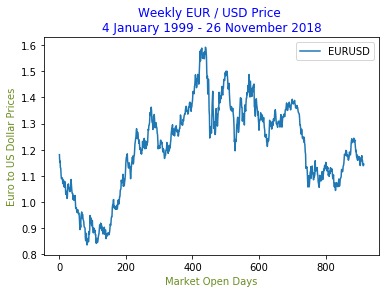

In [5]:
# Assign variables for plotting 
EURUSD = df.loc[:,'EURUSD']

plt.plot (EURUSD)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Euro to US Dollar Prices', color='olivedrab')
plt.title ('Weekly EUR / USD Price \n4 January 1999 - 26 November 2018', color='blue')
plt.legend()

The time series show several self correcting periods undulating across time.  Unlike, other financial time series like stock markets that progress steadily over decades with a strategy to speculate, the foreign exchange market is overwhelmingly made up of participants that are hedging, i.e. offsetting a currency exposure, like a type of insurance.  Hedging behavior and expectations are therefore reflected in the time series.  

# Setting Up ARIMA

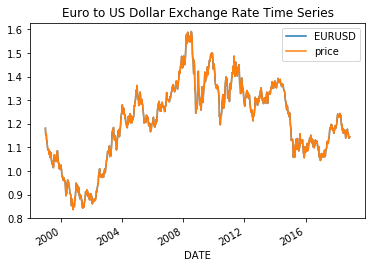

In [7]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Euro to US Dollar Exchange Rate Time Series')
plt.show()

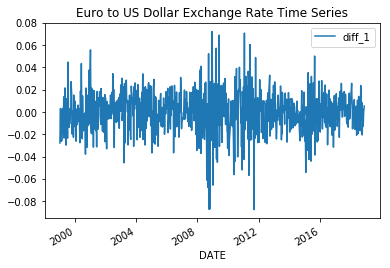

In [8]:
# Plotting the difference 

df['diff_1'] = df.price - df.price.shift()
df.plot(y='diff_1')
plt.title('Euro to US Dollar Exchange Rate Time Series')
plt.show()

Good time series reverting behavior with differencing above . . . and below is the partial autocorrelation function (PACF) that takes the correlation of EUR / USD time series with a lagged version of itself as the correlation lags are the bars. 

Text(0.5,1,'Euro to US DOllar PACF')

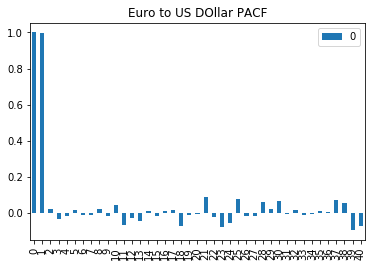

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("Euro to US DOllar PACF")

The weekly Euro to U.S. Dollar data set shows good autocorrelation to use the ARIMA model. 

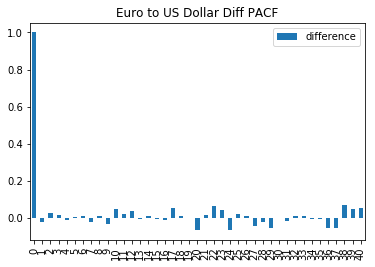

In [10]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Euro to US Dollar Diff PACF")
plt.legend(['difference'])

# ARIMA

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/lacivert/anaconda3/lib/python3.7/site-package

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  915
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2361.840
Method:                           css   S.D. of innovations              0.018
Date:                Sun, 02 Dec 2018   AIC                          -4719.681
Time:                        08:10:12   BIC                          -4710.043
Sample:                             1   HQIC                         -4716.002
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.978e-05      0.001     -0.066      0.948      -0.001       0.001
Residuals Description
count    9.150000e+02
mean     3.349665e-10
std      1.832227e-02
min     -8.746022e-02
25%     -1.091022e-02

Not good as the confidence interval has crossed zero with -0.001 and a p value not below 0.05, but 0.948 so let's configure.  Changing the lag value from zero to 1 for autoregression, difference order change from 1 to zero and not changing moving average model and keeping with zero, i.e. order=(0,1,0) to order=(1,0,0). 

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  916
Model:                     ARMA(1, 0)   Log Likelihood                2364.019
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 02 Dec 2018   AIC                          -4722.038
Time:                        19:22:59   BIC                          -4707.578
Sample:                             0   HQIC                         -4716.519
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1970      0.079     15.155      0.000       1.042       1.352
ar.L1.price     0.9934      0.003    299.201      0.000       0.987       1.000
                                    Roots       

Better with confidence interval not crossing zero, but 0.987 and 1.000 for the autoregressive lag of ar.L1.price and a p value less then 0.05 with 0.000 is an improvement.  

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  916
Model:                     ARMA(1, 1)   Log Likelihood                2364.179
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 02 Dec 2018   AIC                          -4720.358
Time:                        08:15:22   BIC                          -4701.078
Sample:                             0   HQIC                         -4712.999
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1967      0.080     14.995      0.000       1.040       1.353
ar.L1.price     0.9936      0.003    303.430      0.000       0.987       1.000
ma.L1.price    -0.0183      0.032     -0.566    

The moving average of ma.L1.price is not good with -0.082 crossing zero in the confidence interval and a bad p value of 0.572.  Let's try exponential smoothing to predict next week's exchange rate.

In [15]:
# Exponential Smoothing data treatment
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model_expSm = SimpleExpSmoothing(df.price) 
model_expSm_fit = model_expSm.fit()

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
# make prediction
yhat = model_expSm_fit.predict(len(df.price), len(df.price))
print(yhat)

916    1.144687
dtype: float64


/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


For a market that does not close, the continuous behavior of the foreign exchange market fits exponential smoothing as you would ask to buy a one week forward contract of the EUR / USD exchange rate for $1.144687 to hedge your currency exposure to the U.S. Dollar if you or your corporation reports financials in the Euro currency.  

Furthermore, the residuals are plotted below demonstrating some level of normality and mean reverting behavior.

Text(0.5,1,'Histogram of Residuals')

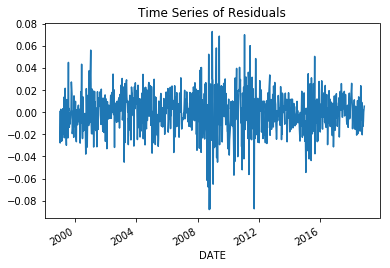

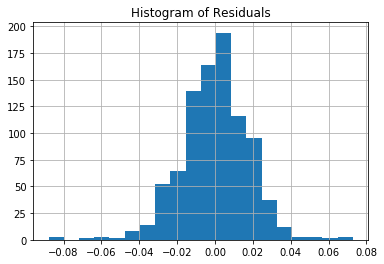

In [19]:
residuals = pd.DataFrame(model_expSm_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The ARIMA model is imperfectly useful for the rapid price liquidity of the foreign exchange market.  Further analysis of the 1, 3 or 6 month forward rates would add value here to address stationarity of the data.  Ideally, passing parameters of order=(1,1,1) to employ AR, autoregression, I, integrated and MA, moving average, respectively, would yield better results for prediction.  Nonetheless, the above provides some level of fecundity for foreign exchange price prediction.   